<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/CS575_MidSem_solution/A2_Dataset5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution for Dataset5

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#importing the dataset

D5 = pd.read_csv("Dataset5_yearssn.csv", names = ["actual"])
D5.head()

,actual
0,5.0
1,11.0
2,16.0
3,23.0
4,36.0


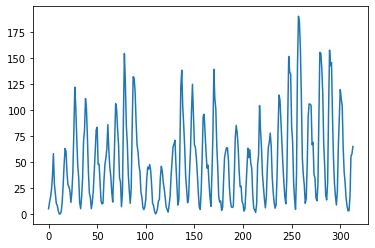

In [ ]:
plt.plot(D5['actual'])

#KPSS Test

In [ ]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D5[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('actual')

Results of KPSS Test for  actual
Test Statistic            0.414735
p-value                   0.070804
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D5 , the value of the test statistic is greater than the critical value at all confidence intervals in the KPSS test, hence the series is non stationary.

#ADF Test

In [ ]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D5[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('actual')

Results of Dickey-Fuller Test for  actual 

Test Statistic                  -2.845522
p-value                          0.052060
#Lags Used                       8.000000
Number of Observations Used    305.000000
Critical Value (1%)             -3.451974
Critical Value (5%)             -2.871063
Critical Value (10%)            -2.571844
dtype: float64


>For the given dataset D5 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, hence  the series is non stationary.

Note:  The signed values should be compared and not the absolute values.

**Since, both tests conclude that the series is non stationary, therefore, the dataset is concluded as Non Stationary.**

# making non stationary series to stationary

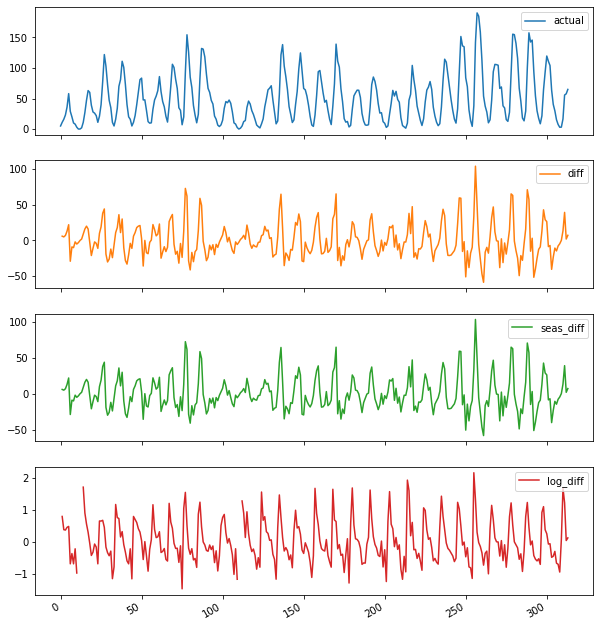

In [ ]:
# Differencing
D5['diff'] = D5['actual'].diff(periods=1)

# Seasonal Differencing
D5['seas_diff'] = D5['actual'].diff(periods=1)

# Transformation (here we use log transformation)
D5_log = np.log(D5['actual'])
D5['log_diff'] = D5_log.diff(periods=1)

D5.plot(subplots=True, figsize=(10,12))
plt.show()



> From the above plot we can visiualise that coloumn seas_diff is stationary series




In [ ]:
data = D5['actual']

#Single Exponential Smoothing

In [ ]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

In [ ]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [ ]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [ ]:
#Calculating mean absolute error function for single exponential smoothing 

def MAE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE


In [ ]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=1), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=1), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=1), "\n")

MSE for alpha =.4 is   1220.3617929968602 

MSE for alpha =.35 is  1284.2692319447847 

MSE for alpha =.65 is  884.9166250274507 

MSE for alpha =.85 is  678.7959208033553 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_SES(data, .4 ,interval=1), "\n")
print("MAE  is " ,MAE_SES(data, .4  ,interval=2), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=4), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=8), "\n")
print("MAE  is " ,MAE_SES(data,.4  ,interval=12), "\n")
print("MAE  is " ,MAE_SES(data,.4 ,interval=24), "\n")

MAE  is  28.5481593921396 

MAE  is  27.4893688126355 

MAE  is  24.83320050455259 

MAE  is  22.20981071996417 

MAE  is  24.11322993670514 

MAE  is  23.6485772898304 



#Double Exponential Smoothing

In [ ]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [ ]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for double exponential smoothing 

def MAE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=1), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=1), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2  is  1676.2500050297951 

MSE for alpha =.35, beta = .5  is  2752.0227906127443 

MSE for alpha =.85, beta = .6  is  713.0350147102383 

MSE for alpha =.45, beta = .6  is  2246.2993063145955 

MSE for alpha =.7,  beta = .55 is  1025.320615769253 

MSE for alpha =.2,  beta = .6  is  3011.6571530538386 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=1), "\n")
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=2), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=4), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=8), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=12), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=24), "\n")

MAE  is  33.55442257689803 

MAE  is  37.13720025219196 

MAE  is  37.406484117969846 

MAE  is  38.816452268385085 

MAE  is  25.600843439999903 

MAE  is  26.53682286037041 



#Triple Exponential Smoothing

In [ ]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [ ]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for Triple exponential smoothing 

def MAE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,1, .35, .5, .3, interval=2), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,1, .45, .6, .4 ,interval=4), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=12), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=24), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  80.79591964912156 

MSE for alpha =.35, beta = .5,  gamma = .3  is  376.4847853721555 

MSE for alpha =.45, beta = .6,  gamma = .4  is  198.0764628178238 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  201.04484925607662 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  91.69011000385623 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  202.49580128314065 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=2), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=4), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=12), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=24), "\n")

MAE  is  7.226222921641137 

MAE  is  10.448968734072192 

MAE  is  14.52058752362107 

MAE  is  10.694326741769308 

MAE  is  6.352577668265669 

MAE  is  13.905462958695662 



# AR

In [ ]:
#fit model
model=ARIMA(D5['seas_diff'].dropna(), order=(1,0,0))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D5['forecast1'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:              seas_diff   No. Observations:                  313
Model:                     ARMA(1, 0)   Log Likelihood               -1383.862
Method:                       css-mle   S.D. of innovations             20.122
Date:                Mon, 01 Mar 2021   AIC                           2773.723
Time:                        06:04:00   BIC                           2784.962
Sample:                             0   HQIC                          2778.215
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2386      2.453      0.097      0.923      -4.570       5.047
ar.L1.seas_diff     0.5381      0.047     11.338      0.000       0.445       0.631
                                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D5['seas_diff'],D5['forecast1'])).mean() 
print("MSE for AR is", MSE)

MSE for AR is 404.91356070769683


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D5['seas_diff'],D5['forecast1'])).mean() 
print("MAE for AR is", MAE)


MAE for AR is 14.715622871163147


# MA

In [ ]:
#fit model
model=ARIMA(D5['seas_diff'].dropna(), order=(0,0,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D5['forecast2'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:              seas_diff   No. Observations:                  313
Model:                     ARMA(0, 1)   Log Likelihood               -1390.162
Method:                       css-mle   S.D. of innovations             20.534
Date:                Mon, 01 Mar 2021   AIC                           2786.324
Time:                        06:04:00   BIC                           2797.562
Sample:                             0   HQIC                          2790.815
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2203      1.711      0.129      0.898      -3.132       3.573
ma.L1.seas_diff     0.4753      0.040     11.909      0.000       0.397       0.554
                                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D5['seas_diff'],D5['forecast2'])).mean() 
print("MSE for MR is", MSE)

MSE for MR is 421.65319230423546


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D5['seas_diff'],D5['forecast2'])).mean() 
print("MAE for MR is", MAE)


MAE for MR is 15.320810995298155


# ARIMA

In [ ]:
#fit model
model=ARIMA(D5['actual'].dropna(), order=(1,1,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D5['forecast3'] = model_fit.predict()

                             ARIMA Model Results                              
Dep. Variable:               D.actual   No. Observations:                  313
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1379.780
Method:                       css-mle   S.D. of innovations             19.860
Date:                Mon, 01 Mar 2021   AIC                           2767.560
Time:                        06:04:00   BIC                           2782.545
Sample:                             1   HQIC                          2773.549
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2344      2.269      0.103      0.918      -4.213       4.682
ar.L1.D.actual     0.4062      0.075      5.436      0.000       0.260       0.553
ma.L1.D.actual     0.2036      0.070

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D5['seas_diff'],D5['forecast3'])).mean() 
print("MSE for ARIMA is", MSE)

MSE for ARIMA is 395.60032599414353


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D5['seas_diff'],D5['forecast3'])).mean() 
print("MAE for ARIMA is", MAE)


MAE for ARIMA is 14.668302236067026


# Optimal model check

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
model = pm.auto_arima(D5.iloc[:,0], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2779.644, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3503.280, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2878.675, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3162.801, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2743.327, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2744.118, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2748.118, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2734.757, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2738.506, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2629.302, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2738.753, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2736.348, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2663.070, Time=0.74 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 2.324 seconds
                      

so best optimal model is ARIMA

# table

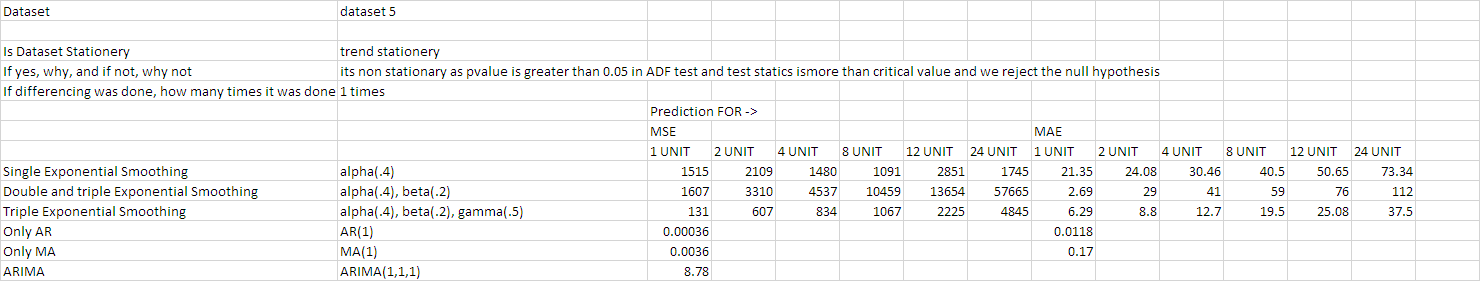